<a href="https://colab.research.google.com/github/MrSimple07/MachineLearning_Practice/blob/main/Python2PosgreSQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python2PosgreSQL

В данном блокноте мы рассмотрим пример взаимодействия Python с PosgreSQL

Дистрибутив для локальной установки PosgreSQL + PGAdmin 4 можно найти на официальном сайте <a href = "https://www.postgresql.org/download/">официальном сайте</a> (детали установки см. "Локальная установка PosgreSQL + PGAdmin 4.pptx")


Для взаимодействия с PosgreSQL будем использовать библиотеку ***psycopg2***.

In [ ]:
!pip install psycopg2-binary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 10.0 MB/s eta 0:00:00


In [ ]:
import psycopg2

In [ ]:
import pandas as pd

Метод psycopg2.connect() представляет собой некий объект соединения с базой данных. Конечно, в нем необходимо указать соответсвующие параметры: имя базы, логин  и пароль пользователя, адрес базы данных и порт.

Важно обратить внимание на адрес базы. Если база развернута локально, а код Питона пишется в Goodle Colab, то подключение блокнота должно быть переключено на локальное соединение.

In [ ]:
connection = psycopg2.connect(user='itmo@ru',
                                  password='online',
                                  host='localhost',
                                  port='5432',
                                  database='postgres')

OperationalError: connection to server at "localhost" (127.0.0.1), port 5432 failed: Connection refused
	Is the server running on that host and accepting TCP/IP connections?
connection to server at "localhost" (::1), port 5432 failed: Cannot assign requested address
	Is the server running on that host and accepting TCP/IP connections?


Не надо закрывать/переоткрывать "connection" пока работаете с базой.

Для исполнения SQL команд, результатов их выполнения и методов доступа к ним используется объект ***cursor***.

In [ ]:
cursor = connection.cursor()

**Выборка данных**

Получим все данные из таблицы "stops" знакомой нам базы "mass_transport". Для этого необходимо выпонить запрос "SELECT * FROM stops"


In [ ]:
cursor.execute("SELECT * FROM stops") # Выполнение SQL-запроса

In [ ]:
data = cursor.fetchall()   # Получение результата
print(data)

[(1286, 'NaN', Decimal('NaN'), Decimal('NaN')), (1329, '8 И 9 ЛИНИЯ ПО БОЛЬШОМУ ПР. [1]', Decimal('59.9391122800'), Decimal('30.2800045000')), (1349, 'АПРАКСИН ПЕР.,ТЕАТР ПРИЮТ КОМЕДИАНТА', Decimal('59.9295310400'), Decimal('30.3246975000')), (1357, 'Б. КОНЮШЕННАЯ УЛ. [3, 27, 22, 24, 7]', Decimal('59.9360979100'), Decimal('30.3214989000')), (1361, 'БАЛТИЙСКИЙ ВОКЗАЛ', Decimal('59.9079391500'), Decimal('30.2999859000')), (1370, 'NaN', Decimal('NaN'), Decimal('NaN')), (1383, 'БОЛЬШАЯ МОНЕТНАЯ УЛ. [46А]', Decimal('59.9609437600'), Decimal('30.3163986000')), (1392, 'БОЛЬШОЙ САМПСОНИЕВСКИЙ ПР. [49, 33, 137]', Decimal('59.9590426700'), Decimal('30.3468647000')), (1434, 'ВЕСЕЛЬНАЯ УЛ. [7]', Decimal('59.9282544700'), Decimal('30.2462120000')), (1442, 'ВОЗНЕСЕНСКИЙ ПР.', Decimal('59.9236577400'), Decimal('30.3107243000')), (1459, 'ГОСТИНИЦА САНКТПЕТЕРБУРГ [49]', Decimal('59.9581980800'), Decimal('30.3413868000')), (1473, 'ДВИНСКАЯ УЛ. 15 [22, 49, 65, 66, 70, 70, 71, 71]', Decimal('59.9090726700

Получили список кортежей, где каждый элемент -- одна строка из таблицы-результата выполнения запроса. Представим данные в через DataFrame.

In [ ]:
# Поместим результаты в датафрейм
data_frame = pd.DataFrame(data, columns=['stop_id', 'stop_name', 'latitude', 'longitude'])
data_frame

,stop_id,stop_name,latitude,longitude
0,1286,NaN,NaN,NaN
1,1329,8 И 9 ЛИНИЯ ПО БОЛЬШОМУ ПР. [1],59.9391122800,30.2800045000
2,1349,"АПРАКСИН ПЕР.,ТЕАТР ПРИЮТ КОМЕДИАНТА",59.9295310400,30.3246975000
3,1357,"Б. КОНЮШЕННАЯ УЛ. [3, 27, 22, 24, 7]",59.9360979100,30.3214989000
4,1361,БАЛТИЙСКИЙ ВОКЗАЛ,59.9079391500,30.2999859000
...,...,...,...,...
537,28965,NaN,NaN,NaN
538,29828,NaN,NaN,NaN
539,30633,NaN,NaN,NaN
540,30634,NaN,NaN,NaN


**Добавление записей в таблицу**

В Питоне есть возможность добавлять запись по одной (cursor.execute(query) или сразу несколько (cursor.executemany(query, list).

Давайте добавим в нашу таблицу новую запись:



In [ ]:
insert_query = """INSERT INTO stops(id_stop, stop_name, latitude,longitude)
VALUES (1, 'Исаакиевская площадь, 4', 59.934180, 30.306116)"""
cursor.execute(insert_query)

Важно понять что в конце изменений необходимо сделать commit. В противном случае при незапланированном закрытии соединения в базу могут попасть "гряэные данные" или незакрытая транзакция залочит всю базу (не стоит надеяться на rollback).

In [ ]:
connection.commit()

Убедимся, что теперь все в порядке.

In [ ]:
cursor.execute("SELECT * FROM stops WHERE id_stop = 1")
data = cursor.fetchall()   # Получение результата
print(data)

[(1, 'Исаакиевская площадь, 4', Decimal('59.9341800000'), Decimal('30.3061160000'))]


**Редактирование записей**

С помощью соответсвующего запроса  мы можем изменить одну или несколько записей через Питон.
Например, поменям stop_name у первой и последней записи (stop_id = 1 и 31671)

In [ ]:
params = [['Исаакиевский собор 1',1], ['неизвестная точка', 31671]]
cursor.executemany("UPDATE stops SET stop_name = %s WHERE id_stop = %s", params)
connection.commit()

Получаем:

In [ ]:
cursor.execute("SELECT * FROM stops WHERE id_stop = 1 OR id_stop = 31671 ") # Выполнение SQL-запроса
data = cursor.fetchall()   # Получение результата
print(data)

[(31671, 'неизвестная точка', Decimal('NaN'), Decimal('NaN')), (1, 'Исаакиевский собор 1', Decimal('59.9341800000'), Decimal('30.3061160000'))]


**Удаление записей**

In [ ]:
delete_query = "DELETE FROM stops WHERE id_stop = 1"
cursor.execute(delete_query)
connection.commit()
# Посмотрим на результат
cursor.execute("SELECT * FROM stops WHERE id_stop = 1")
result = cursor.fetchall()
print("Результат", result)

Результат []


Аналогично редактированию и добавлению, можно удалить сразу несколько записей.

## Пример ##

Добавим наглядности. Вспомним задачу, где требовалось найти ближайшие остановки к определенной точке.

Будем искать ближайшие остановки к Русскому музею.

Пользуясь данными таблицы stops, хранимой функцией CoordinateDistance (которая существует в базе и вычисляет сферическое расстояние в метрах), найдем такие остановки и нанесем их на карту.

Воспользуемся возможностями библиотеки import folium:

In [ ]:
!pip install folium

In [ ]:
import folium

Выведем изображение карты Санкт-Петербурга в районе Русского музея, определив его координаты через GeoPy (GeoPy - это клиент Python, который предоставляет несколько популярных веб-сервисов геокодирования):

In [ ]:
!pip install geopy

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
loc = Nominatim(user_agent="GetLoc")
getLoc = loc.geocode("Русский музей")

In [ ]:
print(getLoc.address)
coordinates = [getLoc.latitude, getLoc.longitude]
print(coordinates)

Русский музей, набережная канала Грибоедова, Дворцовый округ, Санкт-Петербург, Северо-Западный федеральный округ, 191186, Россия
[59.938584750000004, 30.328892942948684]


In [ ]:
map = folium.Map(location = coordinates, zoom_start = 15)

In [ ]:
map

Давайте сначала отметим на карте непосредственно сам музей (нарисуем зеленую окружность):

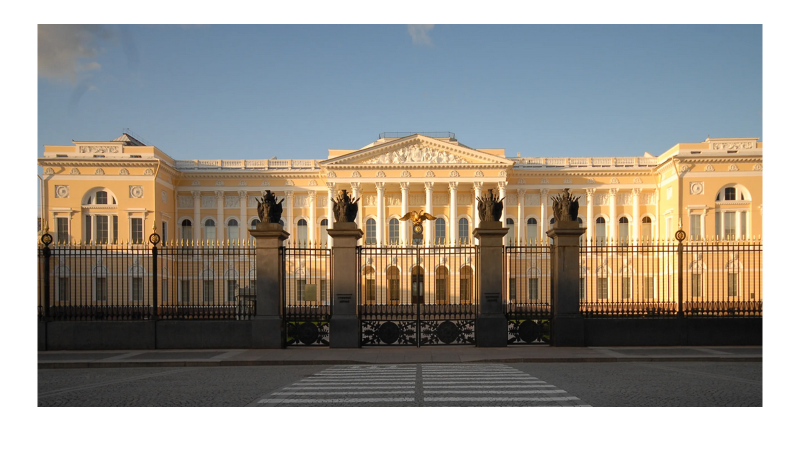


In [ ]:

folium.Circle(location=coordinates,radius=500,
                    popup="Русский музей", color='green',fill_color ='green').add_to(map)
map

Хранимая функция

Теперь выполним запрос, который найдет остановки, находящиеся от памятника на расстоянии не более 500 метров. Координаты остановок находятся в таблице stops. Для вычисления сферического расстояния в базе данных "Общественный транспорт" была создана функция CoordinateDistance. Спецификация функции
CoordinateDistance (Latitude1, Longitude1, Latitude2, Longitude2):
•Latitude1 — широта объекта 1 (числовой тип)
•Longitude1 – долгота объекта 1 (числовой тип)
•Latitude2 — широта объекта 2 (числовой тип)
•Longitude2 – долгота объекта 2 (числовой тип)
Результат функции: сферическое расстояние (в метрах).

In [ ]:
query = """SELECT stop_name, latitude, longitude,
        coordinatedistance(latitude, longitude,%s,%s)
        FROM stops WHERE latitude IS NOT NULL AND	longitude IS NOT NULL
        ORDER BY 4"""
cursor.execute(query % (coordinates[0], coordinates[1]))
data = cursor.fetchall()   # Получение результата
print(data)
data_frame = pd.DataFrame(data, columns=['stop_name', 'latitude', 'longitude', 'distance'])
data_frame

[('Метро Невский проспект (1, 7, 10, 11)', Decimal('59.9353143400'), Decimal('30.3280201000'), Decimal('367')), ('СТ. МЕТРО НЕВСКИЙ ПР. [3, 7, 22, 27, 24]', Decimal('59.9350816600'), Decimal('30.3291683000'), Decimal('390')), ('Метро Невский проспект (1, 5, 7, 10, 11, 22)', Decimal('59.9353930400'), Decimal('30.3248425000'), Decimal('421')), ('СТ. МЕТРО НЕВСКИЙ ПР.', Decimal('59.9353690800'), Decimal('30.3248386000'), Decimal('423')), ('ИНЖЕНЕРНАЯ УЛ. [49]<', Decimal('59.9377334400'), Decimal('30.3366241000'), Decimal('441')), ('ИНЖЕНЕРНАЯ УЛ. [49]', Decimal('59.9370354400'), Decimal('30.3362064000'), Decimal('442')), ('Метро Гостиный двор (1, 5, 7, 10, 11, 22)', Decimal('59.9345033700'), Decimal('30.3319988000'), Decimal('486')), ('ЛЕТНИЙ САД [49]<', Decimal('59.9418219100'), Decimal('30.3349323000'), Decimal('493')), ('Большая Конюшенная улица (1, 5, 7, 10, 11, 22)', Decimal('59.9361116000'), Decimal('30.3215008000'), Decimal('495')), ('Б. КОНЮШЕННАЯ УЛ. [3, 27, 22, 24, 7]', Decimal(

,stop_name,latitude,longitude,distance
0,"Метро Невский проспект (1, 7, 10, 11)",59.9353143400,30.3280201000,367
1,"СТ. МЕТРО НЕВСКИЙ ПР. [3, 7, 22, 27, 24]",59.9350816600,30.3291683000,390
2,"Метро Невский проспект (1, 5, 7, 10, 11, 22)",59.9353930400,30.3248425000,421
3,СТ. МЕТРО НЕВСКИЙ ПР.,59.9353690800,30.3248386000,423
4,ИНЖЕНЕРНАЯ УЛ. [49]<,59.9377334400,30.3366241000,441
...,...,...,...,...
537,NaN,NaN,NaN,NaN
538,NaN,NaN,NaN,NaN
539,NaN,NaN,NaN,NaN
540,неизвестная точка,NaN,NaN,NaN


Добавим первые 5 остановок сосчитанное растояние на нашу интерактивной карте:

In [ ]:

for place in data[0:6]:
  folium.Marker([place[1],place[2]], popup = place[0]).add_to(map)
  folium.PolyLine([coordinates,[place[1],place[2]]], coordinates, weight=3, color = 'brown',tooltip = place[3]).add_to(map)
map

ПРЕДСТАВЛЕНИЕ (VIEW)

In [ ]:
query_view = """select * from v_russian_museum_stops"""
cursor.execute(query_view)
data_view = cursor.fetchall()   # Получение результата
print(data_view)
data_frame_view = pd.DataFrame(data_view, columns=['stop_name', 'latitude', 'longitude'])
data_frame_view

[('Б. КОНЮШЕННАЯ УЛ. [3, 27, 22, 24, 7]', Decimal('59.9360979100'), Decimal('30.3214989000')), ('ИНЖЕНЕРНАЯ УЛ. [49]', Decimal('59.9370354400'), Decimal('30.3362064000')), ('СТ. МЕТРО НЕВСКИЙ ПР. [3, 7, 22, 27, 24]', Decimal('59.9350816600'), Decimal('30.3291683000')), ('ИНЖЕНЕРНАЯ УЛ. [49]<', Decimal('59.9377334400'), Decimal('30.3366241000')), ('ЛЕТНИЙ САД [49]<', Decimal('59.9418219100'), Decimal('30.3349323000')), ('СТ. МЕТРО НЕВСКИЙ ПР.', Decimal('59.9353690800'), Decimal('30.3248386000')), ('Метро Невский проспект (1, 5, 7, 10, 11, 22)', Decimal('59.9353930400'), Decimal('30.3248425000')), ('Метро Гостиный двор (1, 5, 7, 10, 11, 22)', Decimal('59.9345033700'), Decimal('30.3319988000')), ('Метро Невский проспект (1, 7, 10, 11)', Decimal('59.9353143400'), Decimal('30.3280201000')), ('Большая Конюшенная улица (1, 5, 7, 10, 11, 22)', Decimal('59.9361116000'), Decimal('30.3215008000'))]


,stop_name,latitude,longitude
0,"Б. КОНЮШЕННАЯ УЛ. [3, 27, 22, 24, 7]",59.9360979100,30.3214989000
1,ИНЖЕНЕРНАЯ УЛ. [49],59.9370354400,30.3362064000
2,"СТ. МЕТРО НЕВСКИЙ ПР. [3, 7, 22, 27, 24]",59.9350816600,30.3291683000
3,ИНЖЕНЕРНАЯ УЛ. [49]<,59.9377334400,30.3366241000
4,ЛЕТНИЙ САД [49]<,59.9418219100,30.3349323000
5,СТ. МЕТРО НЕВСКИЙ ПР.,59.9353690800,30.3248386000
6,"Метро Невский проспект (1, 5, 7, 10, 11, 22)",59.9353930400,30.3248425000
7,"Метро Гостиный двор (1, 5, 7, 10, 11, 22)",59.9345033700,30.3319988000
8,"Метро Невский проспект (1, 7, 10, 11)",59.9353143400,30.3280201000
9,"Большая Конюшенная улица (1, 5, 7, 10, 11, 22)",59.9361116000,30.3215008000


In [ ]:
for stop in data_view:
  print(stop[0])
  folium.Marker([stop[1],stop[2]], popup = stop[0]).add_to(map)
  folium.PolyLine([coordinates,[stop[1],stop[2]]], coordinates, weight=3, color = 'blue',tooltip = place[3]).add_to(map)
map

Б. КОНЮШЕННАЯ УЛ. [3, 27, 22, 24, 7]
ИНЖЕНЕРНАЯ УЛ. [49]
СТ. МЕТРО НЕВСКИЙ ПР. [3, 7, 22, 27, 24]
ИНЖЕНЕРНАЯ УЛ. [49]<
ЛЕТНИЙ САД [49]<
СТ. МЕТРО НЕВСКИЙ ПР.
Метро Невский проспект (1, 5, 7, 10, 11, 22)
Метро Гостиный двор (1, 5, 7, 10, 11, 22)
Метро Невский проспект (1, 7, 10, 11)
Большая Конюшенная улица (1, 5, 7, 10, 11, 22)


Закрываем соединение с БД:

In [ ]:
if connection:
    cursor.close() # Сначала закрываем курсор, а потом соединение!
    connection.close()
    print("Соединение с PostgreSQL закрыто")

Соединение с PostgreSQL закрыто


In [ ]:
def CoordinateDistance (Latitude1, Longitude1, Latitude2, Longitude2):
    Latitude1 = math.radians(Latitude1)  # переводим в радианы
    Longitude1 = math.radians(Longitude1)
    Latitude2 = math.radians(Latitude2)
    Longitude2 = math.radians(Longitude2)
    dist1 = Longitude2 - Longitude1
    dist2 = Latitude2 - Latitude1
    a = math.sin(dist2/2)**2 + math.cos(Latitude1) * math.cos(Latitude2) * math.sin(dist1/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = c * 6371.3 # радиус земли в км
    return distance